<a href="https://colab.research.google.com/github/Ayuniarfina/Final-Project-Bangkit---JKT4-B/blob/Ayuni-branch/BaseModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
zipref = zipfile.ZipFile('/content/gdrive/My Drive/Bangkit Assignment/Final Project/datasets_faceExpressions.zip')
zipref.extractall('/tmp/dataset')

In [ ]:
traindir = '/tmp/dataset/images/images/train'
valdir = '/tmp/dataset/images/images/validation'

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

traingenerator = train_datagen.flow_from_directory(
    traindir,
    target_size=(150,150),
    batch_size=80,
    class_mode='categorical',
    subset='training'
)
 
val_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0)

valgenerator = val_datagen.flow_from_directory(
    valdir,
    target_size=(150,150),
    batch_size=80,
    class_mode='categorical'
)


Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
# Basic Model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
history = model.fit_generator(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
1442/1442 [==============================] - 27s 19ms/step - loss: 1.6117 - acc: 0.3546 - val_loss: 1.4080 - val_acc: 0.4604
Epoch 2/10
1442/1442 [==============================] - 27s 19ms/step - loss: 1.3014 - acc: 0.5007 - val_loss: 1.2496 - val_acc: 0.5224
Epoch 3/10
1442/1442 [==============================] - 27s 19ms/step - loss: 1.1426 - acc: 0.5651 - val_loss: 1.2108 - val_acc: 0.5365
Epoch 4/10
1442/1442 [==============================] - 26s 18ms/step - loss: 0.9779 - acc: 0.6312 - val_loss: 1.2187 - val_acc: 0.5559
Epoch 5/10
1442/1442 [==============================] - 26s 18ms/step - loss: 0.7879 - acc: 0.7075 - val_loss: 1.3334 - val_acc: 0.5521
Epoch 6/10
1442/1442 [==============================] - 26s 18ms/step - loss: 0.5803 - acc: 0.7873 - val_loss: 1.5011 - val_acc: 0.5545
Epoch 7/10
1442/1442 [==============================] - 26s 18ms/step - loss: 0.4063 - acc: 0.8552 - val_loss: 1.8761 - val_acc: 0.5501
Epoch 8/10
1442/1442 [==========================

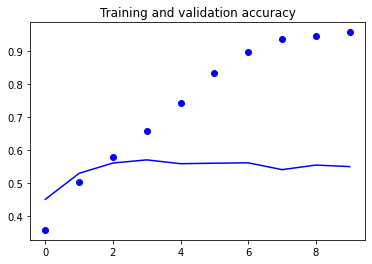

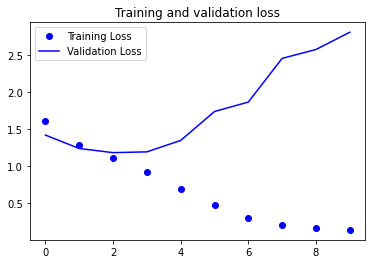

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=1e-4), metrics=['acc'])

In [ ]:
history = model.fit_generator(train_generator, epochs=10, validation_data=validation_generator)

Epoch 1/10
1442/1442 [==============================] - 26s 18ms/step - loss: 0.0621 - acc: 0.9846 - val_loss: 3.5676 - val_acc: 0.5645
Epoch 2/10
1442/1442 [==============================] - 26s 18ms/step - loss: 0.0363 - acc: 0.9921 - val_loss: 4.0129 - val_acc: 0.5634
Epoch 3/10
1442/1442 [==============================] - 26s 18ms/step - loss: 0.0268 - acc: 0.9944 - val_loss: 4.3754 - val_acc: 0.5682
Epoch 4/10
1442/1442 [==============================] - 26s 18ms/step - loss: 0.0213 - acc: 0.9954 - val_loss: 4.7480 - val_acc: 0.5671
Epoch 5/10
1442/1442 [==============================] - 26s 18ms/step - loss: 0.0187 - acc: 0.9957 - val_loss: 4.9454 - val_acc: 0.5658
Epoch 6/10
1442/1442 [==============================] - 26s 18ms/step - loss: 0.0166 - acc: 0.9964 - val_loss: 5.1880 - val_acc: 0.5689
Epoch 7/10
1442/1442 [==============================] - 26s 18ms/step - loss: 0.0147 - acc: 0.9964 - val_loss: 5.3478 - val_acc: 0.5655
Epoch 8/10
1442/1442 [==========================